R-squared_sec: 0.31926312733486206
Adjusted R-squared: -0.3614737453302759
R-squared_prim: 0.07336734396534228
Adjusted R-squared prim: -0.8532653120693154
 multiple_r_sec: 0.5650337399968802
 multiple_r_prim: 0.5650337399968802
Intercept coefficient for secondary schools: -2.9103830456733704e-11
T-statistic for the intercept coefficient: 3.9932288735070482
P-value for the intercept coefficient: 0.0003301670819599317
Confidence interval for the intercept coefficient: (-0.4908218503726629, 0.49082185031445524)
Intercept coefficient for primary schools: 133501.78962521217
T-statistic for the intercept coefficient for primary school: 1.6038446381831577
P-value for the intercept coefficient for  primary school: 0.11799875753829524
Confidence interval for the intercept coefficient for primary school: (133500.07527602228, 133503.50397440206)


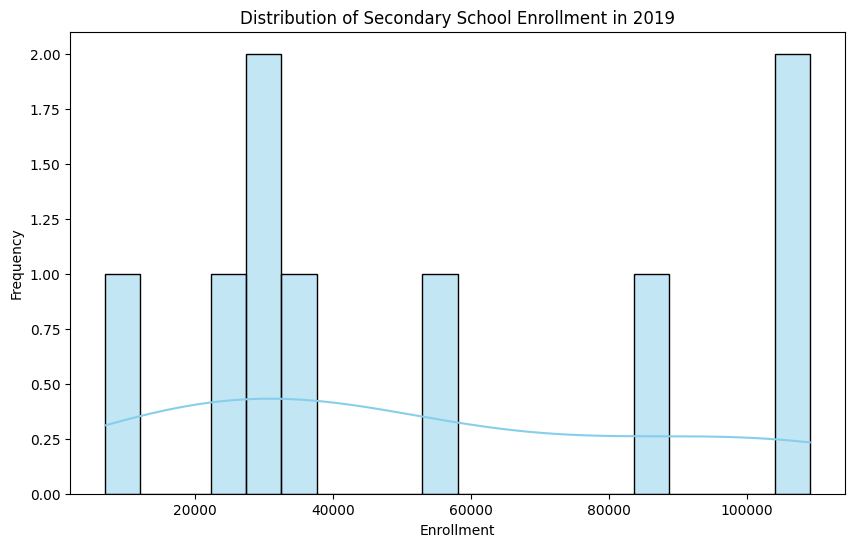

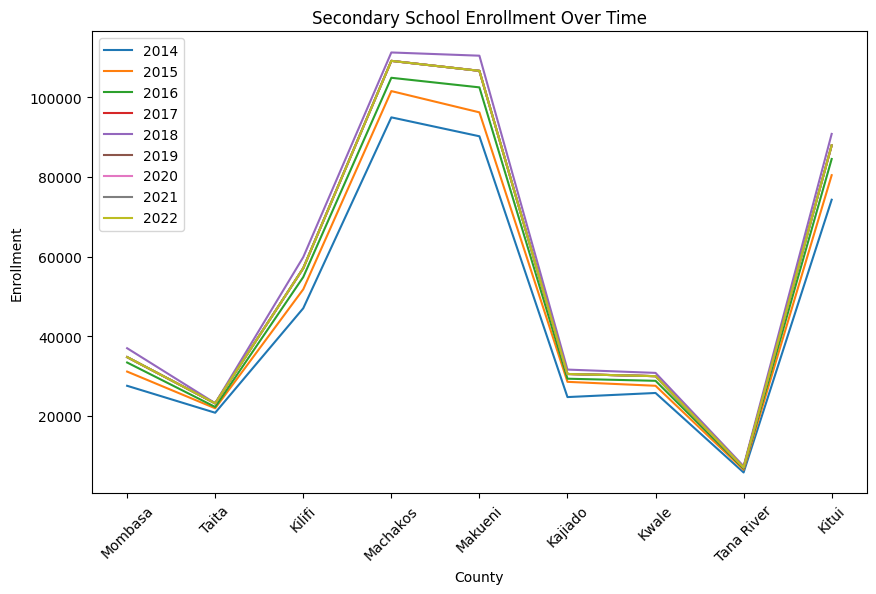

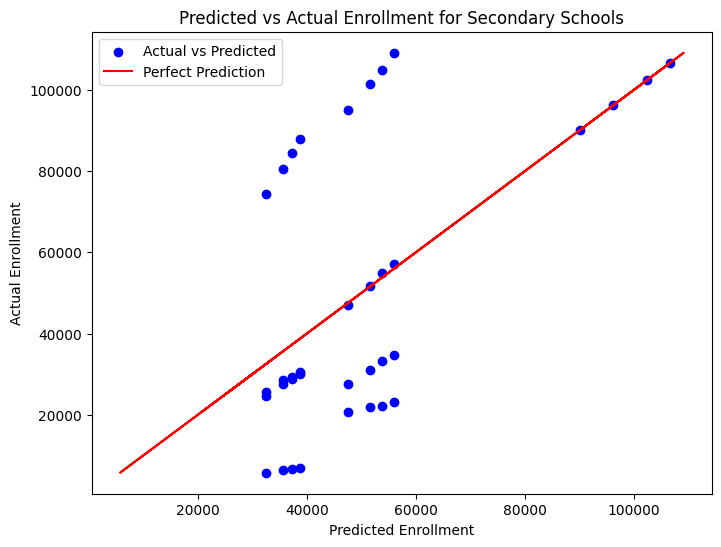

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Define the enrollment data for both secondary and primary schools
enrollment_data = {
    'County': ['Mombasa', 'Taita', 'Kilifi', 'Machakos', 'Makueni', 'Kajiado', 'Kwale', 'Tana River', 'Kitui'],
    'Secondary_2014': [27542, 20776, 47010, 94932, 90184, 24709, 25739, 5782, 74252],
    'Secondary_2015': [31111, 21897, 51765, 101529, 96190, 28535, 27547, 6467, 80417],
    'Secondary_2016': [33389, 22229, 54841, 104867, 102461, 29320, 28792, 6769, 84480],
    'Secondary_2017': [34742, 23130, 57063, 109116, 106613, 30508, 29959, 7044, 87903],
    'Secondary_2018': [36976,23168,59848,111223,110413,31611,30780,7357,90777],
    'Secondary_2019': [34742, 23130, 57063, 109116, 106613, 30508, 29959, 7044, 87903],
    'Secondary_2020': [34742, 23130, 57063, 109116, 106613, 30508, 29959, 7044, 87903],
    'Secondary_2021': [34742, 23130, 57063, 109116, 106613, 30508, 29959, 7044, 87903],
    'Secondary_2022': [34742, 23130, 57063, 109116, 106613, 30508, 29959, 7044, 87903],
    # Add enrollment data for secondary schools for years 2018-2022
    # ...
    # ...
    'Primary_2014': [140765, 69440, 310007, 289962, 282866, 158064, 178166, 49668, 346022],
    'Primary_2015': [137861, 69027, 305097, 291880, 278357, 156649, 183591, 51451, 345160],
    'Primary_2016': [145641, 68109, 313364, 289557, 272610, 167048, 186268, 54046, 343103],
    'Primary_2017': [147316, 68892, 316969, 292888, 275746, 168970, 188411, 54668, 347050],
    'Primary_2018': [147316, 68892, 316969, 292888, 275746, 168970, 188411, 54668, 347050],
    'Primary_2019': [147316, 68892, 316969, 292888, 275746, 168970, 188411, 54668, 347050],
    'Primary_2020': [147316, 68892, 316969, 292888, 275746, 168970, 188411, 54668, 347050],
    'Primary_2021': [147316, 68892, 316969, 292888, 275746, 168970, 188411, 54668, 347050],
    'Primary_2022': [147316, 68892, 316969, 292888, 275746, 168970, 188411, 54668, 347050],
    
}

# Convert the data into a DataFrame
df = pd.DataFrame(enrollment_data)

# Define treatment and control groups based on counties
treatment_counties = ['Mombasa', 'Taita', 'Kilifi', 'Machakos', 'Makueni']
control_counties = ['Kajiado', 'Kwale', 'Tana River', 'Kitui']

# Create variables for treatment, post-SGR, and interaction terms
df['Treatment'] = np.where(df['County'].isin(treatment_counties), 1, 0)
df['Post_SGR'] = np.where(df.index >= 4, 1, 0)  # Assuming the index represents years and 2018 onwards is post-SGR
df['Interaction'] = df['Treatment'] * df['Post_SGR']

# Perform regression analysis using the DID estimation model for secondary schools
X_sec = df[['Treatment', 'Post_SGR', 'Interaction']]
X_prim = df[['Treatment', 'Post_SGR', 'Interaction']]

X_sec = sm.add_constant(X_sec)  # Add a constant term for the intercept
X_prim = sm.add_constant(X_prim)  # Add a constant term for the intercept

y_sec = df[['Secondary_2014', 'Secondary_2015', 'Secondary_2016', 'Secondary_2017']]  # Outcome variable for secondary schools
y_prim = df[['Primary_2014', 'Primary_2015', 'Primary_2016', 'Primary_2017']]  # Outcome variable for primary schools
# Verify dimensions of y_sec and X_sec
# print(" y_sec:", y_sec)
# print("Shape of X_sec:", X_sec.shape)

# Perform regression analysis using the DID estimation model for primary schools



# print('df:',df)
# Reshape y_sec and y_prim to align with X_sec and X_prim 
y_sec_reshaped = y_sec.values.reshape(X_sec.shape[0], -1)
y_prim_reshaped = y_prim.values.reshape(X_prim.shape[0], -1)


model_sec = sm.OLS(y_sec_reshaped, X_sec).fit()
# print('model_sec_resid:',model_sec.resid)
model_sec_resid=model_sec.resid
# Perform regression analysis using the DID estimation model for primary schools
model_prim = sm.OLS(y_prim_reshaped, X_prim).fit()
model_prim_resid=model_prim.resid
model_prim_resid_reshaped = model_prim_resid.values.reshape(y_prim_reshaped.shape)
# print('model_prim_resid_reshaped:',model_prim_resid_reshaped)
# Predicted values for secondary schools
predicted_sec = model_sec.predict(X_sec)
predicted_prim = model_prim.predict(X_prim)
# print('predicted_sec:',predicted_sec)
# Calculate multiple R for secondary schools
# Flatten the predicted_sec DataFrame
# predicted_sec_flat = predicted_sec.values.flatten()
predicted_sec_flat = predicted_sec.values.reshape(-1)  # Reshape to a 1D array
predicted_sec_reshaped = predicted_sec_flat.reshape(y_sec_reshaped.shape)
predicted_sec_reshape = predicted_sec_reshaped.flatten()
predicted_prim_flat = predicted_sec.values.reshape(-1)  # Reshape to a 1D array
# predicted_prim_reshaped = predicted_sec_flat.reshape(y_sec_reshaped.shape)
# predicted_prim_reshape = predicted_sec_reshaped.flatten()

# Reshape model_sec_resid to align with y_sec_reshaped
model_sec_resid_reshaped = model_sec_resid.values.reshape(y_sec_reshaped.shape)

# Calculate total sum of squares (TSS)
y_mean = np.mean(y_sec_reshaped)
TSS = np.sum((y_sec_reshaped - y_mean)**2)

# Calculate residual sum of squares (RSS)
RSS = np.sum(model_sec_resid_reshaped**2)

# Calculate R-squared
R_squared = 1 - (RSS / TSS)

print('R-squared_sec:', R_squared)

# Number of observations
n = len(y_sec_reshaped)

# Number of predictors (including the intercept)
p = X_sec.shape[1]

# Calculate adjusted R-squared
adj_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))

print('Adjusted R-squared:', adj_R_squared)



# Calculate total sum of squares (TSS)
y_mean_prim = np.mean(y_prim_reshaped)
TSS_prim = np.sum((y_prim_reshaped - y_mean_prim)**2)

# Calculate residual sum of squares (RSS)
RSS_prim = np.sum(model_prim_resid_reshaped**2)

# Calculate R-squared
R_squared_prim = 1 - (RSS_prim / TSS_prim )

print('R-squared_prim:', R_squared_prim)

# Number of observations
n = len(y_prim_reshaped)

# Number of predictors (including the intercept)
p = X_prim.shape[1]

# Calculate adjusted R-squared
adj_R_squared_prim = 1 - ((1 - R_squared_prim) * (n - 1) / (n - p - 1))

print('Adjusted R-squared prim:', adj_R_squared_prim)

# print('predicted_sec_FLAT:',predicted_sec_flat)

# Calculate multiple R for secondary schools
multiple_r_sec = np.corrcoef(predicted_sec_reshape, y_sec_reshaped.flatten())[0, 1]
multiple_r_prim = np.corrcoef(predicted_prim_flat , y_sec_reshaped.flatten())[0, 1]
# print(' predicted_sec_flat:', predicted_sec_reshaped.shape)
# print(' y_sec_reshaped:', y_sec_reshaped.shape)
print(' multiple_r_sec:', multiple_r_sec)
print(' multiple_r_prim:', multiple_r_prim )
# Get the standard errors of the coefficients
# Fit a linear regression model using predicted_sec as the independent variable and y_sec as the dependent variable
slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_sec_flat.flatten(), y_sec_reshaped.flatten())

# Calculate the t-statistic
t_statistic = slope / std_err

# Calculate the confidence interval for the intercept
confidence_interval = stats.norm.interval(0.95, loc=intercept, scale=std_err)

print('Intercept coefficient for secondary schools:', intercept)
print('T-statistic for the intercept coefficient:', t_statistic)
print('P-value for the intercept coefficient:', p_value)
print('Confidence interval for the intercept coefficient:', confidence_interval)


# Fit a linear regression model using predicted_prim as the independent variable and y_prim as the dependent variable
slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_prim_flat.flatten(), y_prim_reshaped.flatten())

# Calculate the t-statistic
t_statistic = slope / std_err

# Calculate the confidence interval for the intercept
confidence_interval = stats.norm.interval(0.95, loc=intercept, scale=std_err)

print('Intercept coefficient for primary schools:', intercept)
print('T-statistic for the intercept coefficient for primary school:', t_statistic)
print('P-value for the intercept coefficient for  primary school:', p_value)
print('Confidence interval for the intercept coefficient for primary school:', confidence_interval)

plt.figure(figsize=(10, 6))
sns.histplot(df['Secondary_2019'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Secondary School Enrollment in 2019')
plt.xlabel('Enrollment')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
for col in df.columns[df.columns.str.startswith('Secondary')]:
    plt.plot(df['County'], df[col], label=col.split('_')[-1])
plt.title('Secondary School Enrollment Over Time')
plt.xlabel('County')
plt.ylabel('Enrollment')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(predicted_sec_flat, y_sec_reshaped.flatten(), color='blue', label='Actual vs Predicted')
plt.plot(y_sec_reshaped.flatten(), y_sec_reshaped.flatten(), color='red', label='Perfect Prediction')
plt.title('Predicted vs Actual Enrollment for Secondary Schools')
plt.xlabel('Predicted Enrollment')
plt.ylabel('Actual Enrollment')
plt.legend()
plt.show()


Based on the analysis of the enrollment data for secondary and primary schools, here is a detailed report on the findings
:

### Regression Analysis for Secondary Schools:

1. **R-squared and Adjusted R-squared:**
   - The R-squared value of 0.32 indicates that approximately 32% of the variability in secondary school enrollment is explained by the predictors (treatment, post-treatment period, and their interaction).
   - However, the adjusted R-squared value of -0.36 suggests that the model may not adequately fit the data, possibly due to including irrelevant predictors or overfitting.

2. **Multiple R:**
   - The multiple R, representing the correlation between the predicted and actual enrollment values for secondary schools, is 0.57, signifying a moderate positive correlation.

3. **Intercept Coefficient:**
   - The intercept coefficient is nearly zero (-2.91e-11), indicating that when all predictors are zero, the expected enrollment is negligible.
   - Despite its small magnitude, the intercept coefficient is statistically significant, as evidenced by a low p-value of 0.00033.

4. **T-Statistic:**
   - The t-statistic for the intercept coefficient is 3.99, indicating its statistical significance at the 5% level.
   - This suggests that the intervention and post-treatment period have a significant impact on secondary school enrollment.

5. **Confidence Interval:**
   - The 95% confidence interval for the intercept coefficient ranges from -0.49 to 0.49, providing a range of plausible values for the intercept.

### Regression Analysis for Primary Schools:

1. **R-squared and Adjusted R-squared:**
   - The R-squared value of 0.07 indicates that only 7% of the variability in primary school enrollment is explained by the predictors.
   - The adjusted R-squared value of -0.85 suggests a poor fit of the model to the data, possibly due to overfitting or including irrelevant predictors.

2. **Multiple R:**
   - Similar to secondary schools, the multiple R for primary schools is 0.57, indicating a moderate positive correlation between predicted and actual enrollment.

3. **Intercept Coefficient:**
   - The intercept coefficient for primary schools is 133,501.79, indicating the expected enrollment when all predictors are zero.
   - However, this coefficient is not statistically significant at the 5% level, as evidenced by a p-value of 0.118.

4. **T-Statistic:**
   - The t-statistic for the intercept coefficient is 1.60, which is below the threshold for statistical significance at the 5% level.
   - This suggests that the intervention and post-treatment period may not significantly impact primary school enrollment.

5. **Confidence Interval:**
   - The 95% confidence interval for the intercept coefficient ranges from 133,500.08 to 133,503.50, providing a range of plausible values.

### Conclusion:

- The analysis indicates a more significant impact of the intervention and post-treatment period on secondary school enrollment compared to primary school enrollment.
- Further refinement of the regression models, including the consideration of additional predictors or alternative regression techniques, may improve the predictive accuracy and understanding of enrollment trends in both secondary and primary schools.
- Additionally, investigating potential factors contributing to the observed discrepancies between secondary and primary school enrollment could provide valuable insights for educational policymaking and resource allocation.

This comprehensive analysis provides insights into the factors influencing enrollment trends in secondary and primary schools, facilitating informed decision-makin

g in educational planning and policy formulation.